<h1> CUSTOMER SEGMENTATION FOR CREDIT CARD USER </h1>

## Business Understanding

<ul> 
    <li> Tema: <br>
        Customer segmentation pelanggan kartu kredit<br><br>
    <li> Masalah: <br>Perusahaan ingin membuat strategi pemasaran yang tepat sesuai dengan kondisi pelanggannya.<br><br>
    <li> Tujuan: <br>Membuat customer segmentation agar perusahaan kartu kredit dapat membuat strategi pemasaran yang tepat untuk setiap kelompok pelanggannya.<br><br>
    <li> Pertanyaan: <br>Bagaimana customer segmentation yang tepat berdasarkan informasi pelanggan kartu kredit yang tersedia?<br><br>
    <li> Analytic approach: <br>Clustering<br><br>
    <li> Data Requirements: <br>Aktivitas pembayaran, jumlah saldo dan limit kartu kredit<br><br>
    <li> Kebutuhan Solusi: <br>Keperluan melakukan segmentasi customer untuk strategi marketing<br><br>
    <li> Output:<br>Segmentasi customer berdasarkan aktivitas dan spesifikasi kartu kredit pelanggan<br><br>
</ul>

## Data Source and Dictionary

Dataset diperoleh dari Kaggle (https://www.kaggle.com/arjunbhasin2013/ccdata). Dataset berisi aktivitas 9000 pelanggan aktif kartu kredit selama 6 bulan. Terdapat 18 kolom yang digunakan untuk menggambarkan informasi, aktivitas dan jenis pelanggan.


1. CUSTID : No identifikasi pemegang kartu kredit


2. BALANCE : Jumlah balance yang tersisa untuk melakukan pembelian


3. BALANCEFREQUENCY : Frekuensi perubahan balance, skor antara 0 dan 1(0=tidak sering, 1=sering)


4. PURCHASES : Jumlah pembelian


5. ONEOFFPURCHASES : Maksimum pembelian dalam suatu transaksi 


6. INSTALLMENTSPURCHASES : Jumlah pembelian saat installment


7. CASHADVANCE : Cash in advance given by the user

8. PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

9. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

10. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

11. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid 

12. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

13. PURCHASESTRX : Numbe of purchase transactions made

14. CREDITLIMIT : Limit of Credit Card for user

15. PAYMENTS : Amount of Payment done by user

16. MINIMUM_PAYMENTS : Minimum amount of payments made by user

17. PRCFULLPAYMENT : Percent of full payment paid by user

18. TENURE : Tenure of credit card service for user

<h1>Daftar Isi</h1>

<div class="alert alert-block alert-info" style="margin-top: 40px">
    <ul>
        <li><a href="##Business Undertanding">Business Understanding</a></li>
        <li><a href="##Data Source and Dictionary">Data Source and Dictionary</a></li>
        <li><a href="##K-Means Clustering">K-Means Clustering</a></li>
        <li><a href="##Interpretation of Cluster">Interpretation of Cluster</a></li>
    </ul>
</div>
<br>
<hr>


## Pre-processing Data

In [1]:
# Import Semua Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# Load Data
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dari data di atas dapat diketahui bahwa semua kolom kecuali CUST_ID merupakan data numerik.

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<h2> Handling missing value </h2>

In [5]:
# Mencari Missing Values
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

Kolom MINIMUM_PAYMENTS memiliki 313 data yang kosong dan CREDIT_LIMIT 1 data kosong. Akan kami selidiki data pada MINIMUM_PAYMENTS untuk menemukan cara yang tepat untuk handling missing values.

In [6]:
# informasi kolom  MINIMUM_PAYMENTS
df.MINIMUM_PAYMENTS.describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

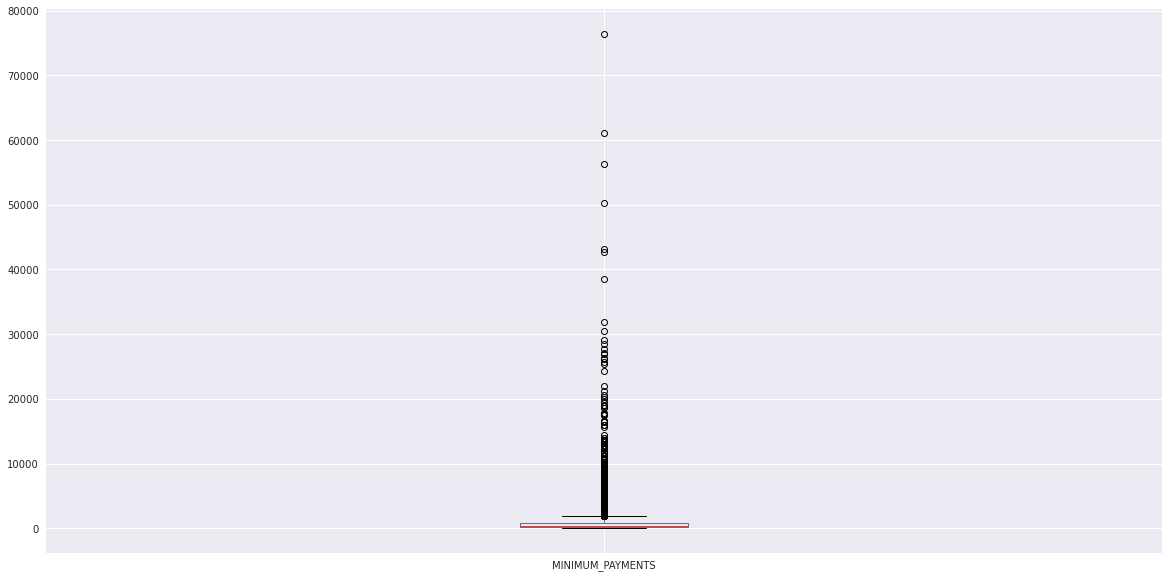

In [7]:
with plt.style.context('seaborn'):
    df.boxplot('MINIMUM_PAYMENTS',figsize=(20,10))
#Di bawah ini terlihat kolom MINIMUM_PAYMENTS memiliki banyak sekali data outlier. 

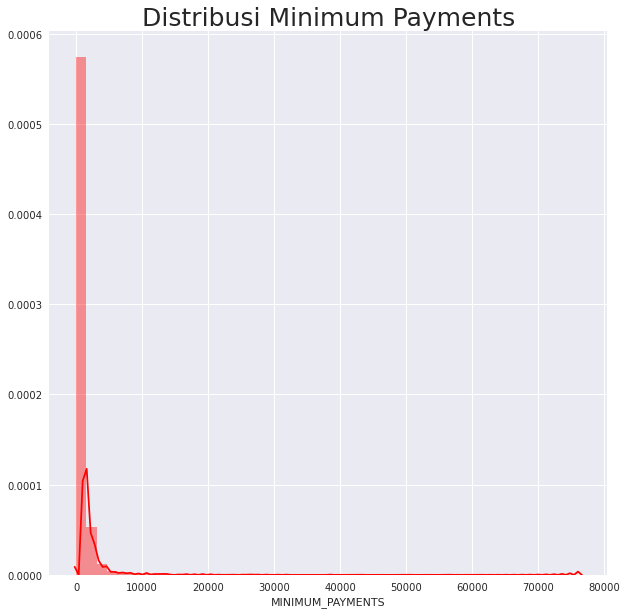

In [8]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,10))
    sns.distplot(df['MINIMUM_PAYMENTS'],color='red')
    plt.title('Distribusi Minimum Payments',fontsize=25)
plt.show()
#Di bawah ini terlihat penyebaran data dari MINIMUM_PAYMENTS sangat tidak merata

Dari kedua informasi di atas, kami memutuskan untuk mengganti missing value dari credit limit dengan rata-rata dan menghapus baris dari minimum payments missing values.

In [9]:
#Me-replace 1 missing value CREDIT_LIMIT dengan rata-rata
df['CREDIT_LIMIT'].replace(np.nan,df['CREDIT_LIMIT'].mean(),inplace=True)

In [10]:
#Menghapus row MINIMUM_PAYMENTS missing values
df.dropna(axis=0,inplace=True)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

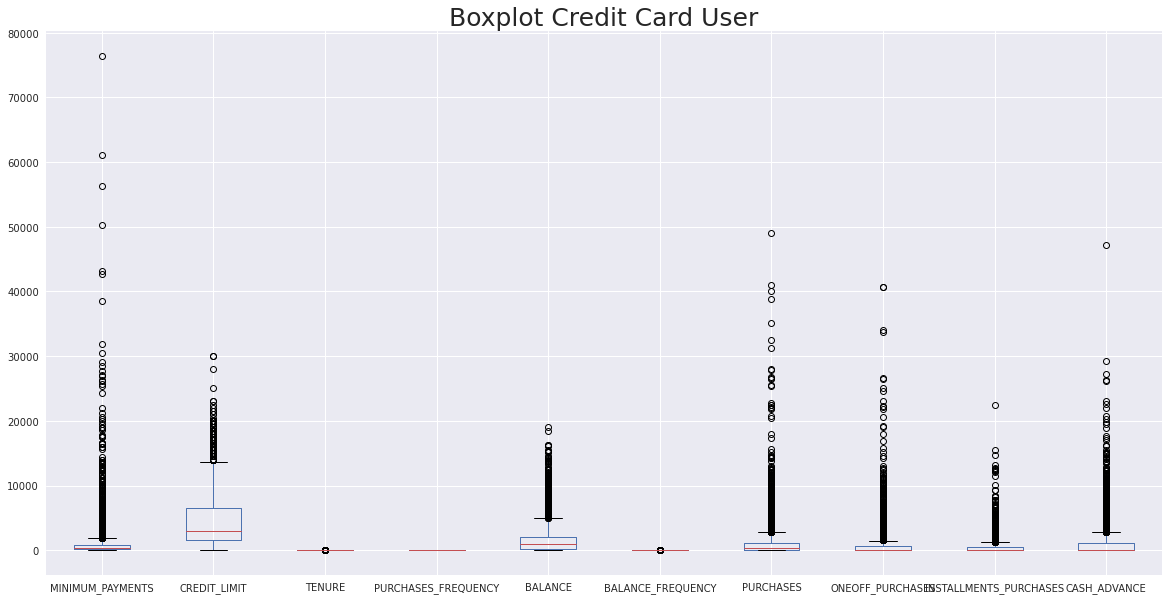

In [11]:
with plt.style.context('seaborn'):
    df.boxplot(figsize=(20,10),column=['MINIMUM_PAYMENTS','CREDIT_LIMIT','TENURE','PURCHASES_FREQUENCY','BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE'])
    plt.title('Boxplot Credit Card User',fontsize=25)
plt.show()

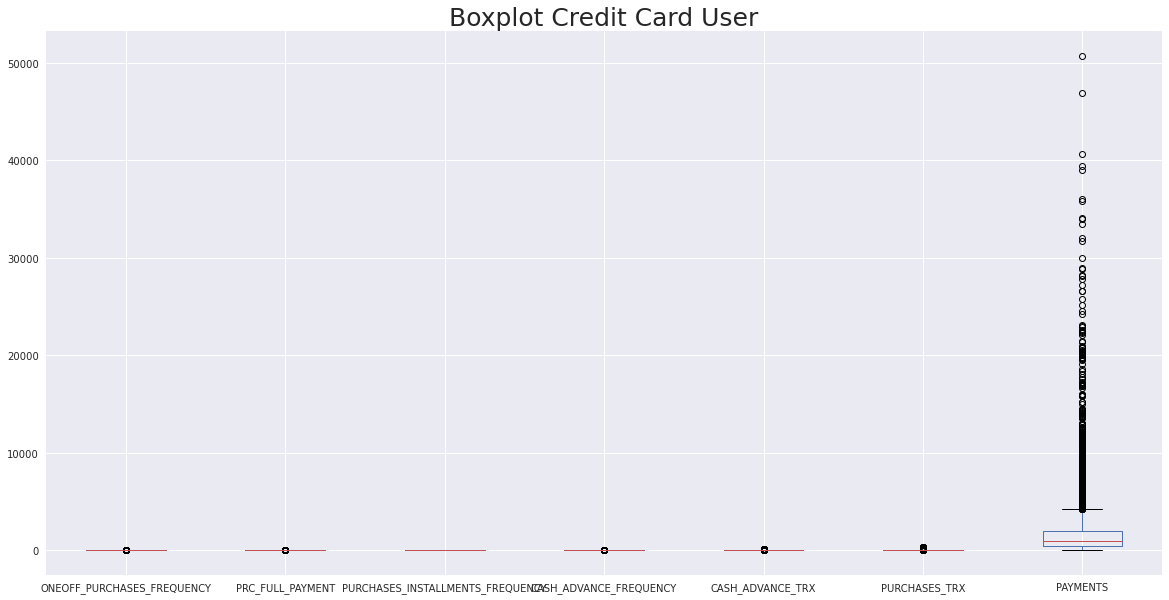

In [12]:
with plt.style.context('seaborn'):
    df.boxplot(figsize=(20,10),column=['ONEOFF_PURCHASES_FREQUENCY','PRC_FULL_PAYMENT','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','PAYMENTS'])
    plt.title('Boxplot Credit Card User',fontsize=25)
plt.show()

Dari boxplot-boxplot di atas terlihat bahwa data memiliki banyak outlier, tetapi kami tidak akan menghapus outliers tersebut, tetapi akan membagi kolom-kolom ke dalam beberapa range agar menghasilkan model yang lebih baik.

<h2> Membagi features ke dalam beberapa range </h2>

In [13]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.00000
mean,1601.041632,0.894951,1025.315149,604.831402,420.794807,994.082050,0.495943,0.205885,0.368778,0.137608,3.313651,15.031492,4522.087829,1784.272537,864.206542,0.159285,11.53375
std,2095.519182,0.207833,2167.010602,1684.222861,917.203254,2121.353259,0.401285,0.300044,0.398090,0.201780,6.912151,25.179530,3659.028526,2909.704331,2372.446607,0.296259,1.31226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.00000
25%,147.838347,0.909091,43.300000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.446951,169.123707,0.000000,12.00000
50%,916.749476,1.000000,375.240000,44.990000,94.710000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.300688,312.343947,0.000000,12.00000
75%,2104.961701,1.000000,1145.850000,598.950000,484.040000,1131.986387,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.116757,825.485459,0.166667,12.00000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.00000


In [14]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT','PAYMENTS', 'MINIMUM_PAYMENTS']

for i in (range(len(columns))):
           
    df.loc[((df[columns[i]]>0)&(df[columns[i]]<=500)),columns[i]]=1
    df.loc[((df[columns[i]]>500)&(df[columns[i]]<=1000)),columns[i]]=2
    df.loc[((df[columns[i]]>1000)&(df[columns[i]]<=3000)),columns[i]]=3
    df.loc[((df[columns[i]]>3000)&(df[columns[i]]<=5000)),columns[i]]=4
    df.loc[((df[columns[i]]>5000)&(df[columns[i]]<=10000)),columns[i]]=5
    df.loc[((df[columns[i]]>10000)),columns[i]]=6
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,1.0,0.818182,1.0,0.0,1.0,0.0,0.166667,0.000000,0.083333,0.000000,0,2,2.0,1.0,1.0,0.000000,12
1,C10002,4.0,0.909091,0.0,0.0,0.0,5.0,0.000000,0.000000,0.000000,0.250000,4,0,5.0,4.0,3.0,0.222222,12
2,C10003,3.0,1.000000,2.0,2.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0,12,5.0,2.0,2.0,0.000000,12
4,C10005,2.0,1.000000,1.0,1.0,0.0,0.0,0.083333,0.083333,0.000000,0.000000,0,1,3.0,2.0,1.0,0.000000,12
5,C10006,3.0,1.000000,3.0,0.0,3.0,0.0,0.666667,0.000000,0.583333,0.000000,0,8,3.0,3.0,3.0,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,1.0,0.500000,1.0,1.0,0.0,0.0,0.166667,0.166667,0.000000,0.000000,0,1,1.0,1.0,1.0,0.000000,6
8945,C19186,1.0,1.000000,1.0,0.0,1.0,0.0,1.000000,0.000000,0.833333,0.000000,0,6,2.0,1.0,1.0,0.500000,6
8947,C19188,1.0,0.833333,1.0,0.0,1.0,0.0,0.833333,0.000000,0.666667,0.000000,0,5,2.0,1.0,1.0,0.250000,6
8948,C19189,1.0,0.833333,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.166667,2,0,1.0,1.0,1.0,0.250000,6


In [15]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for i in (range(len(columns))):
           
    df.loc[((df[columns[i]]>0)&(df[columns[i]]<=0.1)),columns[i]]=1
    df.loc[((df[columns[i]]>0.1)&(df[columns[i]]<=0.2)),columns[i]]=2
    df.loc[((df[columns[i]]>0.2)&(df[columns[i]]<=0.3)),columns[i]]=3
    df.loc[((df[columns[i]]>0.3)&(df[columns[i]]<=0.4)),columns[i]]=4
    df.loc[((df[columns[i]]>0.4)&(df[columns[i]]<=0.5)),columns[i]]=5
    df.loc[((df[columns[i]]>0.5)&(df[columns[i]]<=0.6)),columns[i]]=6
    df.loc[((df[columns[i]]>0.6)&(df[columns[i]]<=0.7)),columns[i]]=7
    df.loc[((df[columns[i]]>0.7)&(df[columns[i]]<=0.8)),columns[i]]=8
    df.loc[((df[columns[i]]>0.8)&(df[columns[i]]<=0.9)),columns[i]]=9
    df.loc[((df[columns[i]]>0.9)&(df[columns[i]]<=1.0)),columns[i]]=10
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,1.0,9.0,1.0,0.0,1.0,0.0,2.0,0.0,10.0,0.0,0,2,2.0,1.0,1.0,0.0,12
1,C10002,4.0,10.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,4,0,5.0,4.0,3.0,3.0,12
2,C10003,3.0,10.0,2.0,2.0,0.0,0.0,10.0,10.0,0.0,0.0,0,12,5.0,2.0,2.0,0.0,12
4,C10005,2.0,10.0,1.0,1.0,0.0,0.0,10.0,10.0,0.0,0.0,0,1,3.0,2.0,1.0,0.0,12
5,C10006,3.0,10.0,3.0,0.0,3.0,0.0,7.0,0.0,6.0,0.0,0,8,3.0,3.0,3.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,1.0,5.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0,1,1.0,1.0,1.0,0.0,6
8945,C19186,1.0,10.0,1.0,0.0,1.0,0.0,10.0,0.0,9.0,0.0,0,6,2.0,1.0,1.0,5.0,6
8947,C19188,1.0,9.0,1.0,0.0,1.0,0.0,9.0,0.0,7.0,0.0,0,5,2.0,1.0,1.0,3.0,6
8948,C19189,1.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2,0,1.0,1.0,1.0,3.0,6


In [16]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for i in (range(len(columns))):
    df.loc[((df[columns[i]]>0)&(df[columns[i]]<=5)),columns[i]]=1
    df.loc[((df[columns[i]]>5)&(df[columns[i]]<=10)),columns[i]]=2
    df.loc[((df[columns[i]]>10)&(df[columns[i]]<=15)),columns[i]]=3
    df.loc[((df[columns[i]]>15)&(df[columns[i]]<=20)),columns[i]]=4
    df.loc[((df[columns[i]]>20)&(df[columns[i]]<=30)),columns[i]]=5
    df.loc[((df[columns[i]]>30)&(df[columns[i]]<=50)),columns[i]]=6
    df.loc[((df[columns[i]]>50)&(df[columns[i]]<=100)),columns[i]]=7
    df.loc[((df[columns[i]]>100)),columns[i]]=8
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,1.0,9.0,1.0,0.0,1.0,0.0,2.0,0.0,10.0,0.0,0,1,2.0,1.0,1.0,0.0,12
1,C10002,4.0,10.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,1,0,5.0,4.0,3.0,3.0,12
2,C10003,3.0,10.0,2.0,2.0,0.0,0.0,10.0,10.0,0.0,0.0,0,3,5.0,2.0,2.0,0.0,12
4,C10005,2.0,10.0,1.0,1.0,0.0,0.0,10.0,10.0,0.0,0.0,0,1,3.0,2.0,1.0,0.0,12
5,C10006,3.0,10.0,3.0,0.0,3.0,0.0,7.0,0.0,6.0,0.0,0,2,3.0,3.0,3.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,1.0,5.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0,1,1.0,1.0,1.0,0.0,6
8945,C19186,1.0,10.0,1.0,0.0,1.0,0.0,10.0,0.0,9.0,0.0,0,2,2.0,1.0,1.0,5.0,6
8947,C19188,1.0,9.0,1.0,0.0,1.0,0.0,9.0,0.0,7.0,0.0,0,1,2.0,1.0,1.0,3.0,6
8948,C19189,1.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1,0,1.0,1.0,1.0,3.0,6


<h2> Standarisasi data </h2>

In [17]:
#Standarisasi data
X = df.values[:,1:]
scale = StandardScaler()
X = scale.fit_transform(X)
X

array([[-1.0165156 , -0.07129743, -0.44858826, ..., -0.65588061,
        -0.63553717,  0.35532361],
       [ 1.27941673,  0.45457441, -1.18531707, ...,  1.34618365,
         0.16102857,  0.35532361],
       [ 0.51410595,  0.45457441,  0.28814055, ...,  0.34515152,
        -0.63553717,  0.35532361],
       ...,
       [-1.0165156 , -0.07129743, -0.44858826, ..., -0.65588061,
         0.16102857, -4.21720687],
       [-1.0165156 , -0.07129743, -1.18531707, ..., -0.65588061,
         0.16102857, -4.21720687],
       [-1.0165156 , -1.12304112,  1.02486935, ..., -0.65588061,
        -0.63553717, -4.21720687]])

# K-Means Clustering

Sebelum melakukan clustering, akan diselidiki terlebih dahulu berapa jumlah cluster terbaik dari dataset.

<h2> Metode Elbow </h2>
Metode elbow merupakan suatu metode yang digunakan untuk menghasilkan informasi dalam menentukan jumlah cluster terbaik.

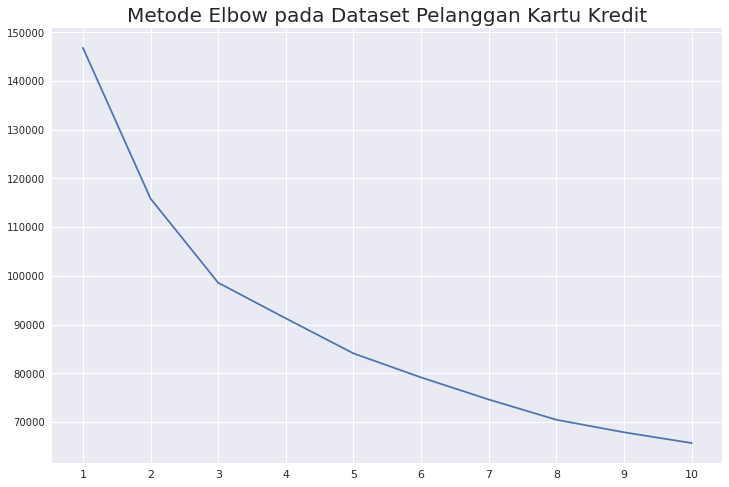

In [18]:
#Metode elbow
with plt.style.context('seaborn'):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(12,8))
    plt.xticks(range(1,11),fontsize=11)
    plt.plot(range(1, 11), wcss)
    plt.title('Metode Elbow pada Dataset Pelanggan Kartu Kredit', fontsize=20)
plt.show()

Dari grafik di atas diperoleh jumlah kluster terbaik adalah 3 atau 5.

<h2> Metode Silhouette </h2>
Metode Silhouette
Silhouette Coefficient digunakan untuk melihat kualitas dan kekuatan cluster, seberapa baik suatu objek ditempatkan dalam suatu cluster.

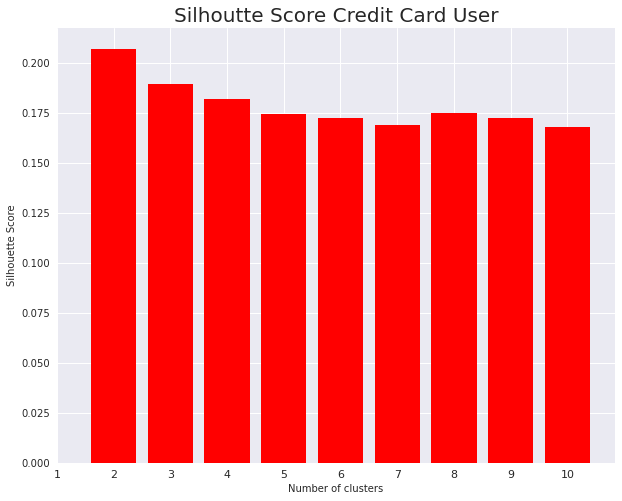

In [19]:
with plt.style.context('seaborn'):
    silhouette_scores = [] 
    for n_cluster in range(2, 11):
        silhouette_scores.append(   
            silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 

    k = [2, 3, 4, 5, 6,7,8,9,10] 
    plt.figure(figsize=(10,8))
    plt.bar(k, silhouette_scores, color='red') 
    plt.title('Silhoutte Score Credit Card User',fontsize=20)
    plt.xticks(range(1,11),fontsize=11)
    plt.xlabel('Number of clusters', fontsize = 10) 
    plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()    

Dari bar plot di atas diperoleh sillhouette terbaik adalah 2. Dari metode elbow dan metode silhouette yang sudah dilakukan, kami akan memilih 5 sebagai jumlah klaster.

<h2>Model</h2>

In [20]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300) 
kmeans.fit(X)
labels = kmeans.labels_
labels

array([3, 1, 4, ..., 3, 0, 4])

In [21]:
df['Class'] = labels
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Class
0,C10001,1.0,9.0,1.0,0.0,1.0,0.0,2.0,0.0,10.0,0.0,0,1,2.0,1.0,1.0,0.0,12,3
1,C10002,4.0,10.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,1,0,5.0,4.0,3.0,3.0,12,1
2,C10003,3.0,10.0,2.0,2.0,0.0,0.0,10.0,10.0,0.0,0.0,0,3,5.0,2.0,2.0,0.0,12,4
4,C10005,2.0,10.0,1.0,1.0,0.0,0.0,10.0,10.0,0.0,0.0,0,1,3.0,2.0,1.0,0.0,12,4
5,C10006,3.0,10.0,3.0,0.0,3.0,0.0,7.0,0.0,6.0,0.0,0,2,3.0,3.0,3.0,0.0,12,3


In [23]:
df_group = df.groupby('Class')[['BALANCE','PURCHASES','PURCHASES_FREQUENCY','ONEOFF_PURCHASES','PURCHASES_TRX','PURCHASES_INSTALLMENTS_FREQUENCY']].mean()
df_group

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES,PURCHASES_TRX,PURCHASES_INSTALLMENTS_FREQUENCY
Class,,,,,,
0,2.466488,0.159786,0.478820,0.109920,0.193029,0.249866
1,4.162095,1.243558,4.736492,0.857024,1.766417,2.780549
2,2.571339,3.568210,9.433041,2.710263,5.756571,8.050688
3,1.430600,1.523591,7.870362,0.196519,2.749885,7.673385
4,1.828859,1.719239,6.766779,1.633110,2.004474,1.383669


In [24]:
col = ['Sisa Saldo','Jumlah Pembelian','Frekuensi Pembelian','Maksimum Pembelian Suatu Transaksi', 'Jumlah Transaksi','Frekuensi Cicilan']
df_group.columns=col
df_group

,Sisa Saldo,Jumlah Pembelian,Frekuensi Pembelian,Maksimum Pembelian Suatu Transaksi,Jumlah Transaksi,Frekuensi Cicilan
Class,,,,,,
0,2.466488,0.159786,0.478820,0.109920,0.193029,0.249866
1,4.162095,1.243558,4.736492,0.857024,1.766417,2.780549
2,2.571339,3.568210,9.433041,2.710263,5.756571,8.050688
3,1.430600,1.523591,7.870362,0.196519,2.749885,7.673385
4,1.828859,1.719239,6.766779,1.633110,2.004474,1.383669


<li> Class 0 : Pelanggan paling jarang melakukan pembelian.</li>
<li> Class 1 : Pelanggan dengan sisa saldo terbesar. </li>
<li> Class 2 : Pelanggan paling konsumtif, suka membeli barang mahal dan membayar dengan cicilan.</li>
<li> Class 3 : Pelanggan yang suka membeli banyak barang dengan nominal harga kecil.</li>
<li> Class 4 : Pelanggan yang membeli barang dengan beragam nominal harga.</li>
    

<h2> Visualisasi Klaster </h2>

Principal Component Analysis (PCA) adalah teknik reduksi dimensi atau pengurangan dimensi. Disini PCA akan digunakan untuk mengurangi dimensi pada data menjadi hanya 2 dimensi. Hal ini dilakukan untuk memudahkan visualisasi data.

In [25]:
#Transformasi data menjadi dua dimensi menggunakan PCA
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8637, 2)

In [26]:
X_PCA

array([[  1.15317545, -30.20089691],
       [ 35.67876529,  17.41476414],
       [-14.08251575,  10.52653246],
       ...,
       [ -2.39936969, -20.5308782 ],
       [ 21.00809558, -19.10231769],
       [ -4.81189693,  -2.2831676 ]])

In [31]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow',
          4: 'purple',
          }

names = {0: 'Pelanggan paling jarang melakukan pembelian', 
         1: 'Pelanggan dengan sisa saldo terbesar', 
         2: 'Pelanggan paling konsumtif, suka membeli barang mahal dan membayar dengan cicilan', 
         3: 'Pelanggan yang suka membeli banyak barang dengan nominal harga kecil', 
         4: ' Pelanggan yang membeli barang dengan beragam nominal harga'
         }
  
df1 = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df1.groupby('label')

groups

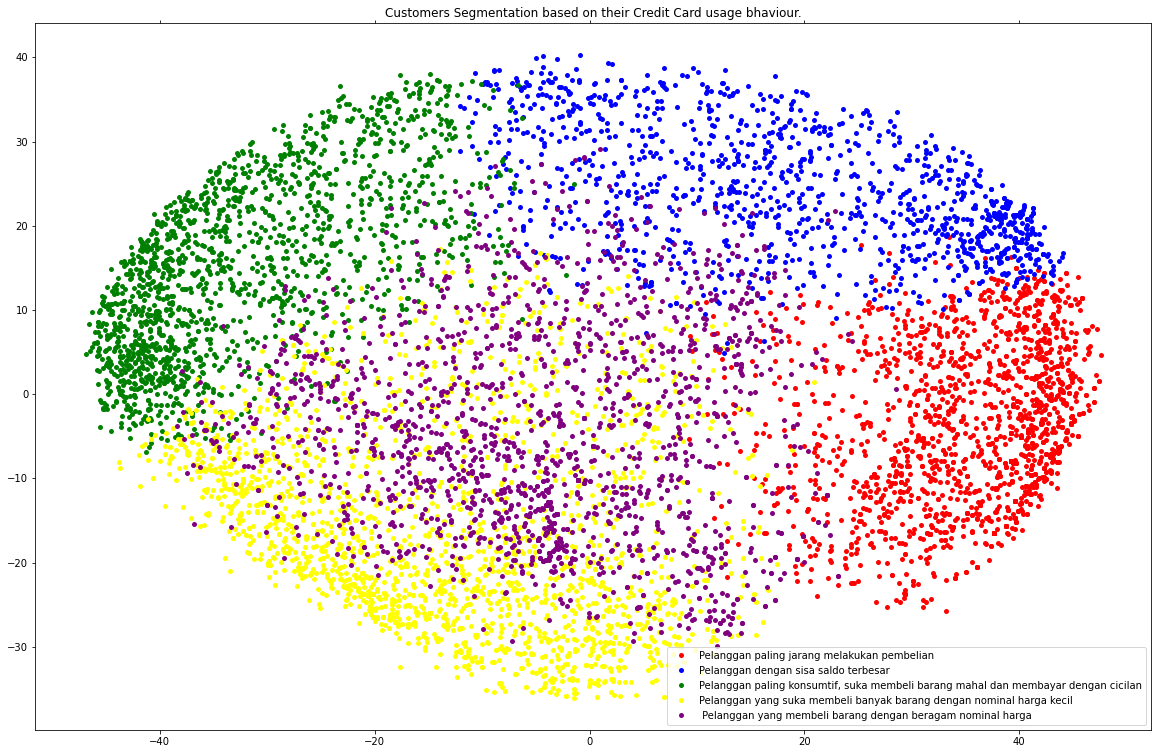

In [32]:

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

# Interpretation of Cluster

Pada gambar di atas dataset sudah terbagi menjadi 5 kelas. 
<li> Warna merah menunjukkan klaster pelanggan paling jarang melakukan pembelian. </li>
<li> Warna biru menunjukkan klaster pelanggan dengan sisa saldo terbesar.</li>
<li> Warna hijau merupakan klaster pelanggan paling konsumtif, suka membeli barang mahal dan membayar dengan cicilan. </li>
<li> Warna kuning merupakan klaster pelanggan yang suka membeli banyak barang dengan nominal harga kecil.</li>
<li> Warna ungu merupakan klaster pelanggan yang membeli barang dengan beragam nominal harga.</li>

#### Manakah klaster pelanggan konsumtif?
Klaster HIJAU, UNGU dan KUNING (gambar bagian kiri)

#### Manakah klaster pelanggan PALING konsumtif?
Klaster HIJAU

#### Manakah klaster pelanggan tidak/kurang konsumtif?
Klaster  MERAH dan BIRU (gambar sebelah kanan)

#### Manakah klaster pelanggan yang suka membayar dengan cicilan?
Klaster HIJAU dan KUNING